In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


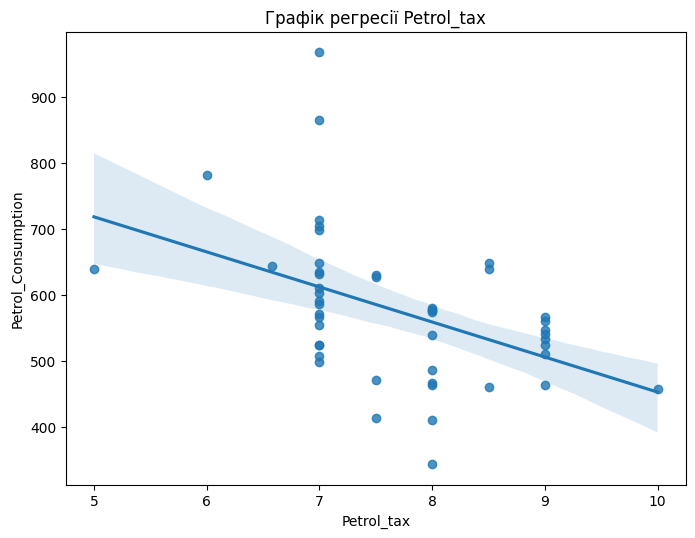

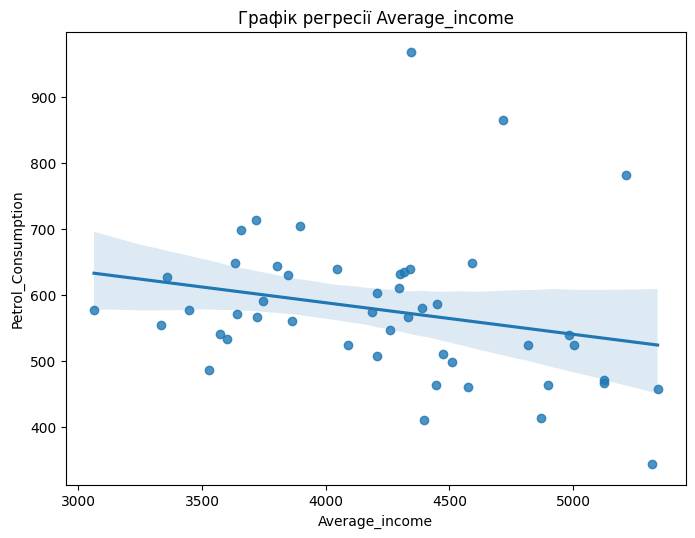

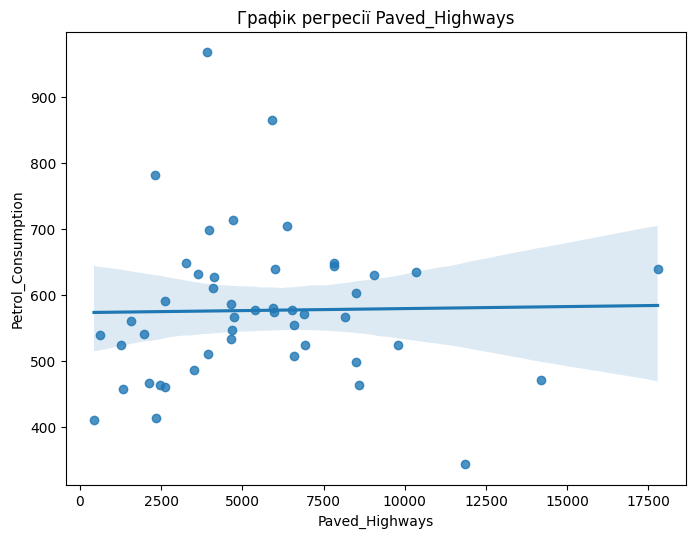

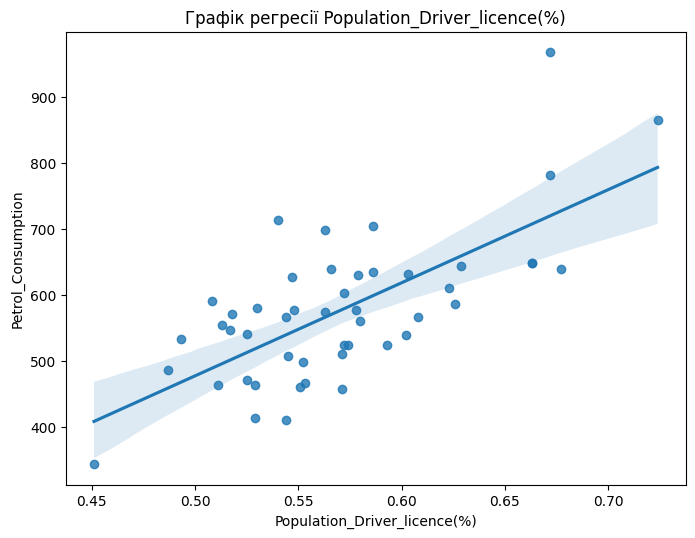

In [7]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Графік регресії {var}')

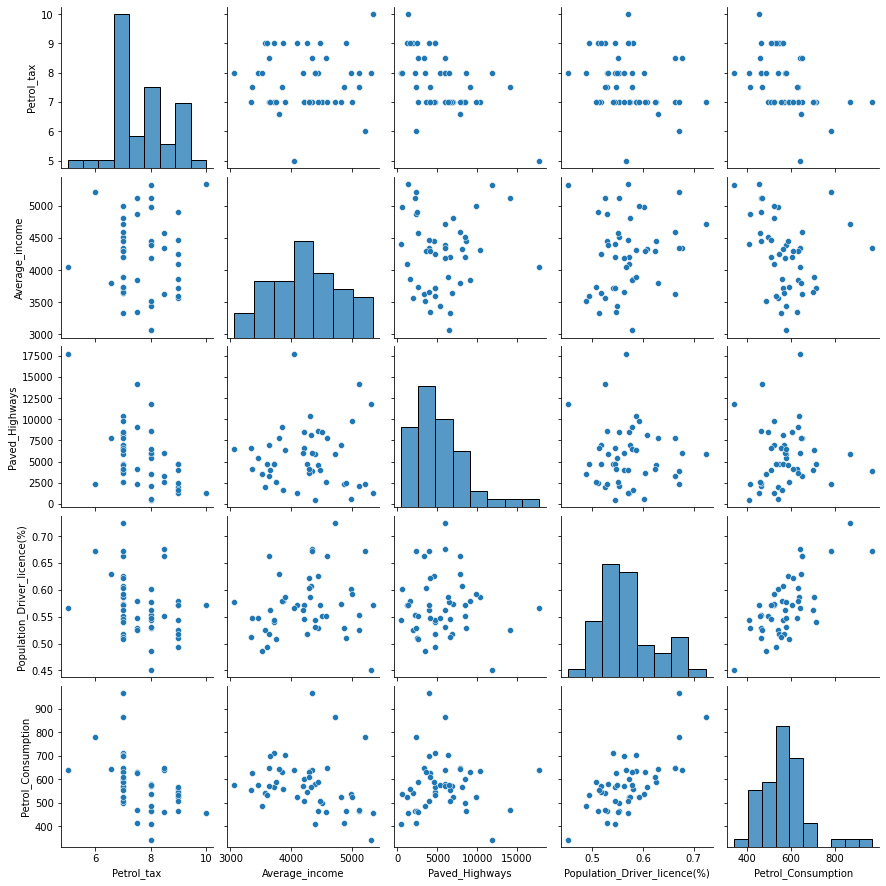

In [3]:
sb.pairplot(df)

In [4]:
correlations = df.corr()
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Кореляція Пірсона')]

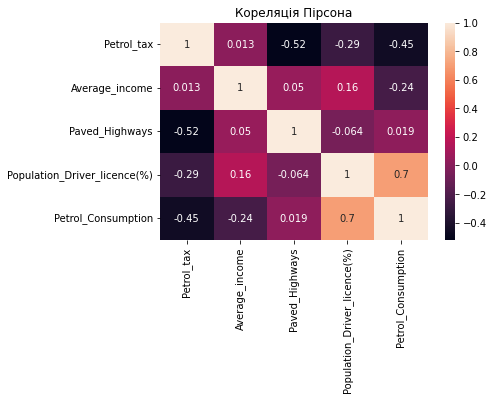

In [6]:
sb.heatmap(correlations, annot=True).set(title='Кореляція Пірсона')

In [20]:
df_data = df[variables].values
df_target = df[['Petrol_Consumption']].values
df_data_names = ['Податок_на бензин', 'Середній_дохід', 'Асфальтовані_шосе', 'Населення_водійських_прав (%)']

X, y = scale(df_data), df_target

In [21]:
missing_values = X == np.NAN
X[missing_values == True]

array([], dtype=float64)

In [22]:
LinReg = LinearRegression()
LinReg.fit(X, y)

print(LinReg.score(X, y))

0.6786867115698207


In [23]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

intercept:  [576.77083333]
slope:  [[-32.7310515  -37.79691223  -8.3813148   73.3569154 ]]


In [24]:
y_pred = LinReg.predict(X)
print('prediction: ', y_pred, sep='\n')

prediction: 
[[523.23372749]
 [553.11530293]
 [578.10744578]
 [493.35625176]
 [532.02892629]
 [433.55141589]
 [318.73259324]
 [491.50595563]
 [489.02463498]
 [550.39466272]
 [500.48954932]
 [442.25333892]
 [563.31260606]
 [566.0237744 ]
 [638.06601138]
 [604.30550439]
 [597.49738202]
 [596.40345112]
 [772.9677508 ]
 [682.70972973]
 [694.9794757 ]
 [570.24033097]
 [415.07930617]
 [460.22150127]
 [507.02812076]
 [531.91824029]
 [588.64881068]
 [612.08788703]
 [558.02256272]
 [471.98285862]
 [566.90705013]
 [581.42200158]
 [651.64983584]
 [613.86729832]
 [506.41719219]
 [716.82376287]
 [647.28207972]
 [641.93375943]
 [717.64832948]
 [733.05284779]
 [662.87034473]
 [633.06544672]
 [644.48932597]
 [556.96750449]
 [713.79948278]
 [519.67828001]
 [670.3978699 ]
 [569.438479  ]]


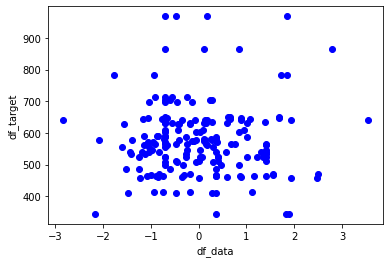

In [28]:
plt.plot(X, y, 'bo')
plt.xlabel('df_data')
plt.ylabel('df_target')
plt.show()

In [31]:
pd.DataFrame({"Fact": y.reshape(-1), "Predicted": y_pred.reshape(-1)})

,Fact,Predicted
0,541,523.233727
1,524,553.115303
2,561,578.107446
3,414,493.356252
4,410,532.028926
5,457,433.551416
6,344,318.732593
7,467,491.505956
8,464,489.024635
9,498,550.394663


In [32]:
mae = sklearn.metrics.mean_absolute_error(y, y_pred)
mse = sklearn.metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

48.777480877082645 3938.541004648505 62.75779636545968
